# CS771A Assignment 3
\- Yash Gupta (190997)

## Q1. Perceptron Algorithm

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Let's read the dataset and preprocess it

In [2]:
# names of the columns of the dataset
cols = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
cols

['variance', 'skewness', 'curtosis', 'entropy', 'class']

In [3]:
# reading the data
data = pd.read_csv('data_banknote_authentication.txt', names=cols)
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
# checking for missing data
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
# changing the negative class label from 0 to -1
data['class'].replace(0, -1, inplace=True)
# data.loc[data['class'] == 0, 'class'] = -1
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,-1
1,4.54590,8.16740,-2.4586,-1.46210,-1
2,3.86600,-2.63830,1.9242,0.10645,-1
3,3.45660,9.52280,-4.0112,-3.59440,-1
4,0.32924,-4.45520,4.5718,-0.98880,-1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
X = data.drop('class', axis=1)
y = data['class']

## Q1. (a)
Code up the perceptron algorithm described on slide 7 of Lecture 15 using the same notation as in the slides.

In [7]:
def perceptron_algo(X, y, thresh):
    w = np.zeros(4) # change
    eta = 1
    t = 0
    t_mistake = 0
    while t - t_mistake < thresh:
        idx = np.random.choice(np.arange(len(X)))
        X_n = X.loc[idx, :]
        y_n = y[idx]
        if y_n * np.dot(w, X_n) < 0:
            w += eta * y_n * X_n
            t_mistake = t
        t += 1
    return w

## Q1. (b)
Write functions to make predictions using the algorithm for the banknotes dataset. Preprocess the dataset to handle missing and anomalous data.

In [8]:
def predict(w, X):
    y = np.zeros(len(X))
    for i in range(len(X)):
        y[i] = 1 if np.dot(w, X.loc[i, :]) >= 0 else -1
    return y

In [9]:
def accuracy(y_pred, y_actual):
    return (y_pred == y_actual).sum() / len(y_actual)

## Q1. (c)
Train the algorithm on the dataset using cross-validation and report cross-validated test set error

### Train-test split

In [10]:
# shuffling the rows of the dataframe
data_shuffle = data.sample(frac=1, random_state=1)
data_shuffle

,variance,skewness,curtosis,entropy,class
1240,-3.55100,1.89550,0.186500,-2.440900,1
703,1.31140,4.54620,2.293500,0.225410,-1
821,-4.01730,-8.31230,12.454700,-1.437500,1
1081,-5.11900,6.64860,-0.049987,-6.520600,1
37,3.62890,0.81322,1.627700,0.776270,-1
...,...,...,...,...,...
715,3.49160,8.57090,-3.032600,-0.591820,-1
905,0.74521,3.63570,-4.404400,-4.141400,1
1096,-4.36670,6.06920,0.572080,-5.466800,1
235,2.04660,2.03000,2.176100,-0.083634,-1


In [11]:
# performing train-test split with 10% of the data as the test data
train_size = int(0.9 * len(data))
data_train = data_shuffle[:train_size].reset_index(drop=True)
data_test = data_shuffle[train_size:].reset_index(drop=True)

In [12]:
def data_split(data):
    data_shuffle = data.sample(frac=1)
    data_shuffle
    train_size = int(0.9 * len(data))
    data_train = data_shuffle[:train_size].reset_index(drop=True)
    data_val = data_shuffle[train_size:].reset_index(drop=True)
    return data_train, data_val

In [13]:
# cross-validation
accuracy_dict = {}
for k in range(5):
    data_train_crossval, data_val = data_split(data_train)
    X_train = data_train_crossval.drop('class', axis=1)
    y_train = data_train_crossval['class']
    X_val = data_val.drop('class', axis=1)
    y_val = data_val['class']
    for thresh in range(5, 30, 5):
        if k == 0:
            accuracy_dict[thresh] = 0
        w = perceptron_algo(X_train, y_train, thresh)
        y_pred = predict(w, X_val)
        acc = accuracy(y_pred, y_val)
        accuracy_dict[thresh] += acc
best_acc = 0
best_thresh = 0
for thresh, acc in accuracy_dict.items():
    acc /= 5
    if acc > best_acc:
        best_acc = acc
        best_thresh = thresh
print('The cross-validated accuracy is', best_acc, 'using a threshold of', best_thresh)

The cross-validated accuracy is 0.432258064516129 using a threshold of 5


## Q1. (d)
Ensure you use a held out validation set and report F1 score on the held out set for your best model

In [14]:
X_train = data_train.drop('class', axis=1)
y_train = data_train['class']
X_test = data_test.drop('class', axis=1)
y_test = data_test['class']
w = perceptron_algo(X_train, y_train, best_thresh)
y_pred = predict(w, X_test)
acc = accuracy(y_pred, y_test)
print('The test set accuracy is', acc, 'using a threshold of', best_thresh)

The test set accuracy is 0.45652173913043476 using a threshold of 5


In [15]:
tp = ((y_pred == y_test) & (y_test == 1)).sum()
fn = ((y_pred != y_test) & (y_test == 1)).sum()
fp = ((y_pred != y_test) & (y_test == -1)).sum()
tn = ((y_pred == y_test) & (y_test == -1)).sum()
p = tp / (tp + fp)
r = tp / (tp + fn)
f1 = 2 * p * r / (p + r)
print('F1 score on the test set is', f1, 'using a threshold of', best_thresh)

F1 score on the test set is 0.626865671641791 using a threshold of 5


## Q2. MCMC Sampling

## Q2. (a)
Write a function to calculate the Bayesian posterior probability given 50 new data samples drawn from a normal distribution with mean 10 and SD 5, assuming a normal prior with mean 25 and s.d. 5. Plot the pdfs of the prior, the likelihood and the posterior distributions. Explain how you derive the likelihood from the data.

Normal Distribution:
$$ p(x | \mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} \exp \left( - \frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 \right) $$

Normal likelihood:
$$ p(\textbf{y} | \mu, \sigma^2) = \prod_{n = 1}^N p(y_n | \mu, \sigma) = \frac{1}{\sigma^N (2 \pi)^{\frac{N}{2}}} \exp \left(- \frac{1}{2 \sigma^2} \sum_{n = 1}^N \left( y_n - \mu \right)^2 \right) $$
$$ = \frac{1}{\sigma^N (2 \pi)^{\frac{N}{2}}} \exp \left( - \frac{1}{2 \sigma^2} \left( \sum_n y_n^2 - 2 \mu \sum_n y_n + N \mu^2 \right) \right) $$
$$ = \frac{1}{\sigma^N (2 \pi)^{\frac{N}{2}}} \exp \left( - \frac{1}{2 \sigma^2} \sum_n y_n^2 \right) \exp \left( - \frac{N}{2 \sigma^2} \left(- 2 \mu \overline{y} + \mu^2 \right) \right) $$
$$ = \frac{1}{\sigma^N (2 \pi)^{\frac{N}{2}}} \exp \left( - \frac{1}{2 \sigma^2} \left( \sum_n y_n^2 - N \overline{y}^2 \right) \right) \exp \left( - \frac{N}{2 \sigma^2} (\overline{y} - \mu)^2 \right) $$
$$ \propto p(\overline{y} | \mu, \sigma^2) $$

Normal prior:
$$ p(\mu | \mu_0, \sigma_0^2) = \frac{1}{\sigma_0 \sqrt{2 \pi}} \exp \left( - \frac{1}{2} \left( \frac{\mu - \mu_0}{\sigma_0} \right)^2 \right) $$
<!-- $$ p(\mu | \mu_0, \sigma_0^2) = p(\mu | 25, 25) = \frac{1}{5 \sqrt{2 \pi}} \exp \left( - \frac{1}{2} \left( \frac{\mu - 25}{5} \right)^2 \right) $$ -->

Posterior:
$$ p(\mu | \textbf{y}) = \frac{p(\mu) p(\textbf{y} | \mu)}{p(\textbf{y})} $$
$$ \propto p(\mu) p(\textbf{y} | \mu) $$
$$ \propto p(\mu) p(\overline{y} | \mu) $$
<!-- $$ \propto p(\overline{y}) p(\mu | \overline{y}) $$
$$ \propto p(\mu | \overline{y}) $$ -->
$$ \propto \exp \left( - \frac{1}{2} \left( \frac{\mu - \mu_0}{\sigma_0} \right)^2 \right) \exp \left( - \frac{N}{2 \sigma^2} (\overline{y} - \mu)^2 \right) $$
$$ \propto \exp \left( - \frac{1}{2} \left( \left( \frac{\mu - \mu_0}{\sigma_0} \right)^2 + \left( \frac{N}{\sigma^2} (\overline{y} - \mu)^2 \right) \right) \right) $$
$$ \propto \exp \left( - \frac{1}{2} \left( \frac{\mu^2}{\sigma_0^2} - \frac{2 \mu \mu_0}{\sigma_0^2} + \frac{\mu_0^2}{\sigma_0^2} + \frac{N \overline{y}^2}{\sigma^2} - \frac{2 N \overline{y} \mu}{\sigma^2} + \frac{N \mu^2}{\sigma^2} \right) \right) $$
$$ \propto \exp \left( - \frac{1}{2} \left( \left( \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \right) \mu^2 - 2 \left( \frac{\mu_0}{\sigma_0^2} + \frac{N \overline{y}}{\sigma^2} \right) \mu + \left( \frac{\mu_0^2}{\sigma_0^2} + \frac{N \overline{y}^2}{\sigma^2} \right) \right) \right) $$
$$ \propto \exp \left( - \frac{1}{2} \left( \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \right) \left( \mu^2 - 2 \left( \frac{\frac{\mu_0}{\sigma_0^2} + \frac{N \overline{y}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}} \right) \mu + \frac{\frac{\mu_0^2}{\sigma_0^2} + \frac{N \overline{y}^2}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}} \right) \right) $$
$$ \propto \exp \left( - \frac{1}{2} \left( \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \right) \left( \mu - \frac{\frac{\mu_0}{\sigma_0^2} + \frac{N \overline{y}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}} \right)^2 \right) $$
$$ \propto \exp \left( - \frac{1}{2} \frac{\left( \mu - \frac{\frac{\mu_0}{\sigma_0^2} + \frac{N \overline{y}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}} \right)^2}{\left( \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \right)^{-1}} \right) $$

<!-- where
$$ p(\textbf{y}) = \int p(\mu) p(\textbf{y} | \mu) d \theta $$

Hence, 
$$ p(\mu | \textbf{y}) = \frac{\frac{1}{5 \sqrt{2 \pi}} \exp \left(- \frac{1}{2} \left( \frac{\mu - 25}{5} \right)^2 \right) \frac{1}{\sigma^N (2 \pi)^{\frac{N}{2}}} \exp \left( - \frac{1}{2 \sigma^2} \sum_{n = 1}^N \left( y_n - \mu \right)^2 \right)}{p(\textbf{y})} $$ -->

Hence, Posterior:
$$ p(\mu | \textbf{y}) \sim N(\mu_1, \sigma_1^2) = \frac{1}{\sigma_1 \sqrt{2 \pi}} \exp \left( - \frac{1}{2} \left( \frac{\mu - \mu_1}{\sigma_1} \right)^2 \right) $$
where
$$ \mu_1 = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{N \overline{y}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}} $$
$$ \sigma_1^2 = \left( \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \right)^{-1} $$

In [16]:
def normal(x, mu=0, sigma=1):
    exp = -(((x - mu) / sigma) ** 2) / 2
    p = np.exp(exp) / (sigma * np.sqrt(2 * np.pi))
    return p

In [17]:
def likelihood(mu, y, sigma=1):
    l = 1
    for y_n in y:
        l *= normal(y_n, mu, sigma)
    return l

In [18]:
def posterior(mu, y, mu0=0, sigma0=1, sigma=1):
    n = len(y)
    y_bar = 0
    for y_n in y:
        y_bar += y_n
    y_bar /= n

    num_mu1 = (mu0 / (sigma0 ** 2)) + (n * y_bar / (sigma ** 2))
    den_mu1 = (1 / (sigma0 ** 2)) + (n / (sigma ** 2))
    mu1 = num_mu1 / den_mu1

    sigma1_sq_inv = (1 / (sigma0 ** 2)) + (n / (sigma ** 2))
    sigma1_sq = 1 / sigma1_sq_inv
    sigma1 = np.sqrt(sigma1_sq)

    return normal(mu, mu1, sigma1)

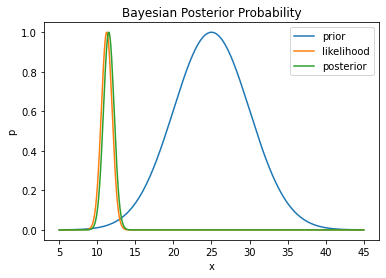

In [51]:
x = np.linspace(5, 45, 1000)
y = np.random.normal(10, 5, 50)
prior = normal(x, 25, 5)
l = likelihood(x, y, 5)
post = posterior(x, y, 25, 5, 5)
plt.plot(x, prior / prior.max(), label='prior')
plt.plot(x, l / l.max(), label='likelihood') #
plt.plot(x, post / post.max(), label='posterior') #
plt.xlabel('x')
plt.ylabel('p')
plt.title('Bayesian Posterior Probability')
plt.legend()
plt.show()

## Q2. (b)
Implement the Metropolis algorithm from the lecture slides to estimate the posterior distribution given the same prior and data and show that it converges to the analytic posterior by plotting a histogram of samples from the distribution alongside the analytic posterior distribution. Assume whatever SD (width) you want for the proposal distribution.

In [20]:
def metropolis_hastings(prior, likelihood, y, mu0=0, sigma0=1, sigma=1):
    hist = [0.0]
    sd = 1
    mu_last = 0.0
    for i in range(1000):
        mu_curr = np.random.normal(mu_last, sd)
        r = (prior(mu_curr, mu0, sigma0) * likelihood(mu_curr, y, sigma)) / (prior(mu_last, mu0, sigma0) * likelihood(mu_last, y, sigma))
        a = np.random.uniform(0, 1)
        if r <= a:
            mu_curr = mu_last
        hist.append(mu_curr)
        mu_last = mu_curr
    return hist

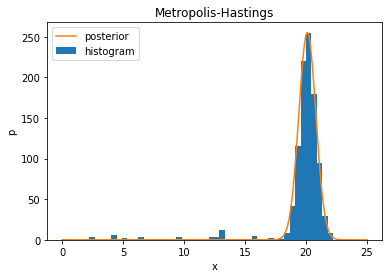

In [70]:
hist = metropolis_hastings(normal, likelihood, y, 25, 5, 5)
x = np.linspace(0, 25, 500)
y_hist, x_hist, _ = plt.hist(hist, 50, label='histogram')
post = posterior(x, y, 25, 5, 5)
plt.plot(x, post / post.max() * y_hist.max(), label='posterior')
plt.xlabel('x')
plt.ylabel('p')
plt.title('Metropolis-Hastings')
plt.legend()
plt.show()

## Q2. (c)
How does the speed of convergence of the sampling depend on the proposal width? Is there an optimal proposal width that would work best? Demonstrate the consequences of using sub-optimal proposal width and terminating sampling too soon.